# <center>Big Data Ingestion</center>

<h2 class="panel-heading">Business Problem</h2>
<div class="text-primary">
<p>
Every business how has more data than can be handled by spreadhseets and traditional databases. So chief data officers for all digital enterprises are creating bigger data lakes at scale on Hadoop. The problem however is that the data lake journey is fraught with governance challenges down the line if not shored up by clear metadata management and governance standards from the start. It turns out that directly opening the data lake for everyone to bring their data, per the intended purpose, is a guaranteed way for the lake to turn into a swamp quickly. There are numerous ways to bring data into Hadoop. Opening and supporting all the available protocols is a governance nightmare.
</p>
<p>
Instead, we found that the best way to ensure a sustainable metadata governance standard is to design a single data manifold -- a self-service data ingestion WYSIWYG interface -- that quarantines input data and enforces a strict annotation, quality, and ownership standard for raw data. A single manifold also addresses challenges like -- 
</p>
<p>
<li>schema-integrity challenges of continuous data</li>
<li>overriding and flagging duplicity of data</li>
<li>quarantining unclassified data</li>
<li>inferring structural semantics of unstructured data</li>
<li>profiling and quality-proofing structured data</li>
<li>triggering automatic curation workflows</li>
<li>more...</li>
</p>
<p>
There are a myriad of ways to ingest, infer, characterize, and store raw data into the data lake environment. Below, a few examples of bringing data into the lake from local files (Excel, CSV, JSON, XML), enterprise databases (SQL Server, MySQL, Postgres, Oracle, SAP BW, Teradata), cloud platforms (Google Big Query, Salesforce, Amazon S3), and from the Internet. Although we do not show the drag-n-drop user-interface, the constructs underlying the data bridge are simple and enabled easily by Spark.
</div>

<h2 class="panel-heading">Ingesting Local File</h2>
<div class="panel-body text-primary">
You can use a myriad of inbuilt ways to ingest local data files. If the file is native to big data platform (like avro or json), you may use Spark's data connector framework directly. If the files are binary files like Excel, you may use Pandas and convert files into Sprk dataframes (and consequently the Hive warehouse).
</div>

In [1]:
# Reading a Excel file
finance_details = pd.read_excel(
    'http://go.microsoft.com/fwlink/?LinkID=521962')

# Display a preview of the file
display(
    HTML(
        '''<h4>Preview of the Excel file</h4> from http://go.microsoft.com/fwlink/?LinkID=521962<p>{0}</p>'''.
        format(finance_details.head().to_html())))

# Describe the dataset (data columns and their percentile stats) 
pd_display(finance_details.describe(include='all'), '''Data characteristics''')

# Infer the dataset schema (data columns, types) 
pd_display(
    pd.DataFrame(
        zip(finance_details.columns.values,
            finance_details.convert_objects().dtypes.values)),
    '''Data types''')

# Create a Spark (aka "big data") frame out of it
finance_df = sqlCtx.createDataFrame(finance_details)

# Display a preview of the big dataset
pd_display(
    finance_df.limit(10).toPandas(),
    '''Preview of the Excel file in Spark's memory''')

# Save the Spark dataframe into the data lake; overwriting data if it already exists
# Make the column names safe for Hadoop standards
finance_df.select([
    F.col('{0}'.format(col)).alias(
        re.sub('[^0-9a-zA-Z_]', '_', col).strip().strip('_'))
    for col in finance_df.columns
]).write.parquet(
    'finance_accts.parquet', mode='overwrite')

# Verify data on disk is intact
pd_display(
    sqlCtx.read.parquet('finance_accts.parquet').limit(10).toPandas(),
    '''Preview of the dataframe in data lake disk''')

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
count,700,700,700,700,700.00,700.0,700.0,7.00e+02,700.00,7.00e+02,700.00,700.0,700,700.00,700,700.0
unique,5,5,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,Government,Mexico,Paseo,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-01 00:00:00,NaN,October,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,NaN,NaN,NaN,NaN,1542.50,10.0,20.0,3.80e+04,2585.25,3.55e+04,22506.25,9242.2,NaN,9.00,NaN,2014.0
75%,NaN,NaN,NaN,NaN,2229.12,250.0,300.0,2.79e+05,15956.34,2.61e+05,245607.50,22662.0,NaN,10.25,NaN,2014.0
max,NaN,NaN,NaN,NaN,4492.50,260.0,350.0,1.21e+06,149677.50,1.16e+06,950625.00,262200.0,NaN,12.00,NaN,2014.0


,0,1
0,Segment,object
1,Country,object
2,Product,object
...,...,...
13,Month Number,int64
14,Month Name,object
15,Year,int64


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,1388534400000000000,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,1388534400000000000,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,1401580800000000000,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Channel Partners,Canada,Montana,None,2518.0,5,12,30216.0,0.0,30216.0,7554.0,22662.0,1401580800000000000,6,June,2014
8,Government,France,Montana,None,1899.0,5,20,37980.0,0.0,37980.0,18990.0,18990.0,1401580800000000000,6,June,2014
9,Channel Partners,Germany,Montana,None,1545.0,5,12,18540.0,0.0,18540.0,4635.0,13905.0,1401580800000000000,6,June,2014


,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year
0,Small Business,France,VTT,Medium,959.0,250,300,287700.0,20139.00,267561.00,239750.0,27811.00,1391212800000000000,2,February,2014
1,Small Business,Mexico,VTT,Medium,2747.0,250,300,824100.0,57687.00,766413.00,686750.0,79663.00,1391212800000000000,2,February,2014
2,Enterprise,Canada,Amarilla,Medium,1645.0,260,125,205625.0,14393.75,191231.25,197400.0,-6168.75,1398902400000000000,5,May,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Government,Canada,Montana,Medium,488.0,5,7,3416.0,273.28,3142.72,2440.0,702.72,1391212800000000000,2,February,2014
8,Government,United States of America,Montana,Medium,1282.0,5,20,25640.0,2051.20,23588.80,12820.0,10768.80,1401580800000000000,6,June,2014
9,Government,Canada,Paseo,Medium,257.0,10,7,1799.0,143.92,1655.08,1285.0,370.08,1398902400000000000,5,May,2014


<div class="panel">
<h2 class="panel-heading">Ingesting HTML File</h2>
<div class="panel-body text-primary">
HTML and Network files can be implemented on top of traditional JSCH like API layers. Below, we show examples of ingesting a HTML resource from the web, a SFTP resource from a file server, and file from Windows share.
</div>
</div>

In [2]:
# Read a HTML resource. In this case, example of most populous countries in the world from Wikipedia
# First table from https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)
pd_display(
    pd.read_html(
        'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)',
        header=0)[0],
    'Most populous countries in the world from HTML page')


# Write a simple routine to read data file from home directory
# We are doing this so as to not inline content here in the public notebook
def read_string(filename):
    with open(filename, 'r') as f:
        return f.read().strip()


# Read a file from FTP server
from os.path import expanduser
# Get home directory
home = expanduser("~/")

# Import pysftp and copy the SFTP file locally. You may be able to get a file handle too
# for big files or use spark-sftp connector
import pysftp

# Open a disposable connection
with pysftp.Connection(
        '192.168.1.50',
        username=read_string('{0}/.uname.txt'.format(home)),
        password=read_string('{0}/.pwd.txt'.format(home))) as sftp:
    with sftp.cd('/tmp'):  # copy locally
        sftp.get('iris.csv', 'iris.csv')

# Make a dataframe and display
pd_display(pd.read_csv('iris.csv'), "Iris spark dataset from a SFTP file")

,Rank,Country or area,UN continental region[1],UN statistical region[1],Population (1 July 2016)[2],Population (1 July 2015)[2],Change
0,—,World,—,—,7432663275,7349472099,7000113193403389230♠+1.1%
1,1,China,Asia,Eastern Asia,1382323332,1376048943,6999455971354210760♠+0.5%
2,2,India,Asia,Southern Asia,1326801576,1311050527,7000120140670978120♠+1.2%
...,...,...,...,...,...,...,...
231,231,Niue,Oceania,Polynesia,1612,1610,6999124223602484470♠+0.1%
232,232,Tokelau,Oceania,Polynesia,1276,1250,7000208000000000000♠+2.1%
233,233,Vatican City[l],Europe,Southern Europe,801,800,6999125000000000000♠+0.1%


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


<div class="panel">
<h2 class="panel-heading">Ingesting from Cloud</h2>
<div class="panel-body text-primary">
<p>Enterprises are increasingly moving to cloud first where data classification may be more open. ARIBA, Workday, Salesforce, AWS have become increasingly common. Your data first arrives into the cloud. In order to import these datasets into the data lake, you have a decent choice of connectors available currently.</p>
</div>
</div>

In [3]:
# We will demonstrate use of Salesforce datasets to be brought into the data lake
sfdc_username = read_string('{0}/.sfdcusername.txt'.format(home))
sfdc_password = read_string('{0}/.sfdcpassword_token.txt'.format(home))

# Read the dataset
sfdc_accounts = sqlCtx.read.format("com.springml.spark.salesforce").option(
    'username', sfdc_username).option('password', sfdc_password).option(
        'soql', 'SELECT Id, Name, BillingCity FROM Account').option(
            'version', '35.0').load()

# Show the preview
pd_display(sfdc_accounts.toPandas(),
           "Salesforce accounts read into the big data lake")

,BillingCity,Id,Name
0,Mountain View,001o000000BJ0jOAAT,GenePoint
1,null,001o000000BJ0jPAAT,"United Oil & Gas, UK"
2,Singapore,001o000000BJ0jQAAT,"United Oil & Gas, Singapore"
...,...,...,...
9,Tucson,001o000000BJ0jXAAT,University of Arizona
10,New York,001o000000BJ0jYAAT,United Oil & Gas Corp.
11,San Francisco,001o000000BJ0jZAAT,sForce


<div class="panel">
<h2 class="panel-heading">Ingesting from enterprise databases</h2>
<div class="panel-body text-primary">
<p>Enterprises also presumably have existing databases (SQL Server, Oracle), warehouses (Teradata, Netezza), and datamarts (Cognos, Microstrategy). There is existing knowledge in these databases that needs to be transferred into the single data lake as well (logically, if not physically) in order for end to end analytical insights. Most of these data sources (including nosql databases) provide standard JDBC connectivity for Spark.</p>

<p>Underneath, we show an example of ingesting from a simple sqlite database which scales just as easily for bigger MPP warehouses as well like Teradata and SAP.</p>

<p>The JDBC path opens a world of possibilities. <strong>Btw, the Spark dataframes and consequently any big data frames can also be written back to JDBC sources making interoperability with existing databases a breeze!</strong></p>
</div>
</div>

In [4]:
# Make a JDBC connection from the local SQLite database into a Spark dataframe
jdbc_db = sqlCtx.read.jdbc(
    url=r"jdbc:sqlite:{0}/chinook.db".format(os.getcwd(
    )),  # The source of the file
    table="(select * from customers) a",  # Prune dataset that you load
    properties={'driver':
                'org.sqlite.JDBC'})  # Driver in the classpath if needed

# Display a preview.
pd_display(jdbc_db.toPandas(
), 'Any JDBC source can be materialized in memory and constructed as a Spark dataframe'
           )

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,Luis,Rojas,None,"Calle Lira, 198",Santiago,None,Chile,None,+56 (0)2 635 4444,None,luisrojas@yahoo.cl,5
57,58,Manoj,Pareek,None,"12,Community Centre",Delhi,None,India,110017,+91 0124 39883988,None,manoj.pareek@rediff.com,3
58,59,Puja,Srivastava,None,"3,Raj Bhavan Road",Bangalore,None,India,560001,+91 080 22289999,None,puja_srivastava@yahoo.in,3


<div class="panel">
<h2 class="panel-heading">Exploring data in memory directly</h2>
<div class="panel-body text-primary">
<p>So what can we do with the data in the lake? Whether that data is physically copied in the warehouse, saved to a local columnar file, or logically referenced in-memory from a existing remote source, most analytics can directly be applied in place. This makes ephemeral analytics and pipelined ETL at scale easy to implement in Spark.</p>
<p>Underneath, we just pick the simplest Iris flower dataset and visually explore for the separability of the features.</p>
</div>
</div>

In [5]:
# Wrap the iris dataset big data frame
iris_pandas_dataset = pd.read_csv('iris.csv')

# Just to show a complex data file...
# Save the Pandas object as a JSON file
iris_pandas_dataset.to_json('iris.json', orient='records')

# Just for demonstration, read the JSON file too
iris_dataset = sqlCtx.read.json('iris.json')

# Show a preview of the data
pd_display(iris_dataset.toPandas(), "Preview of the raw Iris dataset")

# Describe the dataset
pd_display(
    iris_dataset.describe(
        ['`{0}`'.format(colname)
         for colname in iris_dataset.columns]).toPandas(),
    'Column statistics of the dataset')

,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
...,...,...,...,...,...
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica
149,5.1,1.8,5.9,3.0,virginica


,summary,`petal_length`,`petal_width`,`sepal_length`,`sepal_width`,`species`
0,count,150,150,150,150,150
1,mean,3.7586666666666693,1.1986666666666672,5.843333333333335,3.0540000000000007,None
2,stddev,1.764420419952262,0.7631607417008414,0.8280661279778637,0.43359431136217375,None
3,min,1.0,0.1,4.3,2.0,setosa
4,max,6.9,2.5,7.9,4.4,virginica


<div class="panel">
<h2 class="panel-heading">Data Visualization</h2>
<div class="panel-body text-primary">
<p>In order to check the separability of the flowers, let us visually rendition the scatter plot of the data. If they are separable, we ought to easily spot the void space between the scatter groups.</p>
</div>
</div>

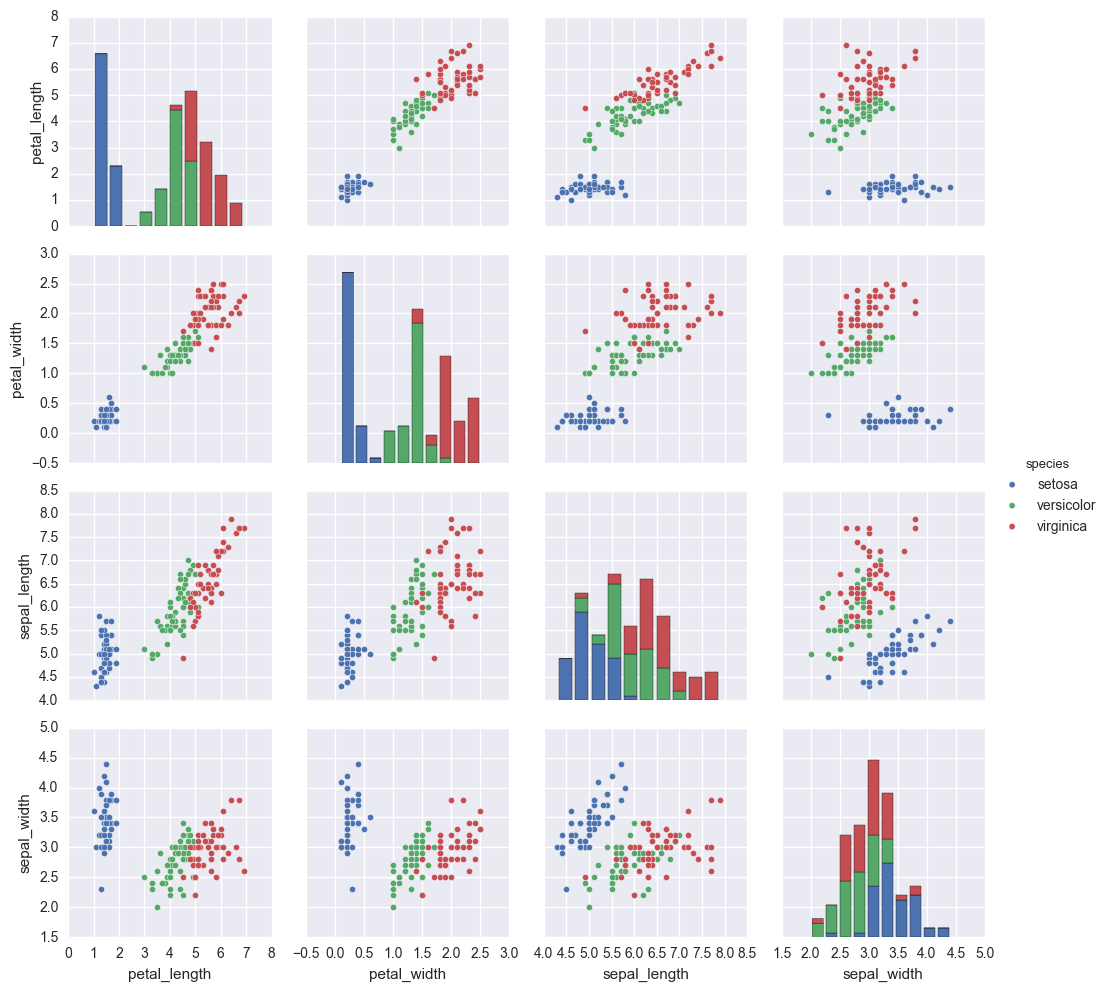

In [ ]:
%matplotlib inline

# Plot the dataset; color each species of Iris with different colors
sns.pairplot(iris_dataset.toPandas(), hue="species")

<div class="panel">
<h2 class="panel-heading">Findings</h2>
<div class="panel-body text-primary">
<p>We observe that Setosa species is of course clearly separable from the other two species. The Versicolor and Virginica species of Iris are however not easily separable.</p>
</div>
</div>

<div class="panel">
<h2 class="panel-heading">Shape Data</h2>
<div class="panel-body text-primary">
<p>Raw files do not come prepped for analysis. You must indispensably change the raw data into an analytical shape first. You can choose to do that in the lake before downstream data marts can consume the data or directly atop the ODBC connector on top of Impala/Tez/Spark. Underneath, we show how you can implement star-schema in Spark.</p>
</div>
</div>

> Men are from Mars. Women are from Venus.

<div class="panel">
<h2 class="panel-heading">Gender Movies</h2>
<div class="panel-body text-primary">
<p>The movie lens data (http://grouplens.org/datasets/movielens/) provides Likert ratings of movies as entered by viewers. Based on this data, we want to identify if there are movies that have substantive difference in likings by men and women; and if there are, we want to identify the top 10 movies that have maximum disagreement between men and women.</p>
<p>Underneath is also an example for how can mix imperative, declarative, and functional style programming to shape the data.</p>
</div>
</div>

In [ ]:
# Bring the ratings, users, and movies data from the web

# Ratings
ratings = sqlCtx.createDataFrame(
    pd.read_csv(
        'http://files.grouplens.org/datasets/movielens/ml-100k/u.data',
        sep='\t',
        names=['user_id', 'item_id', 'rating', 'timestamp'],
        usecols=[0, 1, 2]))

# Users
users = sqlCtx.createDataFrame(
    pd.read_csv(
        'http://files.grouplens.org/datasets/movielens/ml-100k/u.user',
        sep='|',
        names=['user_id_dim', 'age', 'gender', 'occupation', 'zip'],
        usecols=[0, 2]))

# Movies
movies = sqlCtx.createDataFrame(
    pd.read_csv(
        'http://files.grouplens.org/datasets/movielens/ml-100k/u.item',
        sep="|",
        usecols=[0, 1]),
    schema=['movie_id_dim', 'movie_title'])

# Display the raw dimensional tables of users and movies
pd_display(movies.toPandas(), 'Movies dimension table from MovieLens')
pd_display(users.toPandas(), 'Users dimension table from MovieLens')

# Display the factual ratings table
pd_display(ratings.toPandas(), 'Ratings fact table from MovieLens')

<div class="panel">
<h2 class="panel-heading">Star-schema Join (Declarative SQL)</h2>
<div class="panel-body text-primary">
<p>We can overlay the dimensional tables over factual data with simple multiway join. Let us just employ simple <strong>declarative (SQL)</strong> syntax in Spark to accomplish it. The strongest advantage of using Spark, besides inbuilt machine learning libraries, is the ability to mix and match imperative, declarative, and functional style programming in the same workflow in memory.</p>
</div>
</div>

In [ ]:
# Join the dimensional definitions with factual tables to obtain denormalized representation
norm_ratings = sqlCtx.sql(
    'select a.*, b.*, c.* from {0} a join {1} b join {2} c on a.user_id = b.user_id_dim and a.item_id = movie_id_dim'.
    format(ratings.reg(), users.reg(), movies.reg()))

# Show a preview of the star-schema table
pd_display(
    norm_ratings.limit(10).toPandas(),
    "Denormalized star schema movielens ratings table")

<div class="panel">
<h2 class="panel-heading">Aggregations (Functional Programming)</h2>
<div class="panel-body text-primary">
<p>We will employ aggregations using functional programming <strong>(groupBy, agg)</strong> to compute average ratings for every movie as rated by each gender.</p>
<p>The grouping still only groups ratings by gender and leaves ratings on successive rows of data. In order to employ simple delta logic, it is best to place the ratings for each movie per gender in the same row in two different columns. In order to get the columns, we can pivot the grouped table.</p>
</div>
</div>

In [ ]:
# Let us average the rating per movie per gender
# Group by movie name and gender; compute average rating per group
avg_ratings = norm_ratings.groupBy(
    ['movie_title', 'gender']).agg(F.avg('rating').alias('rating'))

# Display the aggregated average ratings
pd_display(avg_ratings.toPandas(), "Average ratings by each gender per movie")

# Pivot to flatten gender averages per movie on a single line
# Group movie into a single line, but project individual gender ratings
# as separate columns in the result file.
pivot_avg_ratings = avg_ratings.groupBy('movie_title').pivot('gender').agg(
    F.first('rating'))

# Display the pivoted values to show averages
pd_display(pivot_avg_ratings.toPandas(),
           "Average ratings per movie, separated by gender ratings in columns")

<div class="panel">
<h2 class="panel-heading">Computations (Declarative SQL)</h2>
<div class="panel-body text-primary">
<p>With ratings aligned in the right shape, we can compute movies that have maximum separation of ratings between men and women. Positive diff ratings mean Men like the movies more than women. A negative diff rating means women like the movies better than men.</p>
</div>
</div>

In [ ]:
# Compute movies that have the maximum ratings polarity between two genders and display top 10
polar_movies = sqlCtx.sql(
    'select movie_title, F as female_rating, M as male_rating, (M-F) as diff from {0} order by abs(diff) desc limit 10'.
    format(pivot_avg_ratings.reg()))

# Display the movies
pd_display(polar_movies.toPandas(),
           "Top 10 movies that are rated differently by men and women.")

<div class="panel">
<h2 class="panel-heading">Conclusion</h2>
<div class="panel-body text-primary">
<p>The key messages from this notebook are --
<ol>
<li>Do not embark on the data lake journey and turn it into a swamp by diving in with the data</li>
<li>Good data lake begins with good governance; and good governance begins with good metadata</li>
<li>Ensure good data practices at inlet. Design a good data manifold to bring data in; shut down unregulated inlets for discouraging unauthorized transfers into the lake</li>
<li>Easily bring data from on-prem, cloud, local, internet, and enterprise sources with simple one-liners</li>
<li>Profile data immediately upon ingestion and assign a clear attribution to the data</li>
<li>Infer schemas automatically; also check data/schema integrity</li>
<li>Store raw data for provenance. But use massively parallel processing to shape and stage data for analytics</li>
<li>Enable easy physical, logical, or ephemeral integration with in-memory engine of Spark</li>
<li>Combine declarative, imperative, and functional style programming to cater to many skills and personas</li>
<li>Apply traditional star-models; apply analytical models as the challenge demands</li>
</ol>
</p>
</div>
</div>